In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 3. 제주도와 타 국내 지역과의 재난지원금 사용 금액 비교

국내 재난지원금 신청,지급 가구수 데이터: https://www.mois.go.kr/frt/bbs/type010/commonSelectBoardArticle.do?bbsId=BBSMSTR_000000000008&nttId=77379

In [275]:
data = pd.read_csv("전국재난지원금현황.csv")
data = data.dropna()
data.head()

,지역,소계,현금,신용체크카드,상품권,선불카드,금액
0,서울,"3,558,746","406,085","2,846,553","18,588","287,520","2,256,329"
1,부산,"1,224,116","239,161","833,351","4,420","147,184","783,091"
2,대구,"846,823","147,916","587,368","42,371","69,168","555,569"
3,인천,"1,085,203","144,178","760,323","180,702",0,"716,754"
4,광주,"485,532","76,166","377,352","32,014",0,"318,130"


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   소계      17 non-null     object
 2   현금      17 non-null     object
 3   신용체크카드  17 non-null     object
 4   상품권     17 non-null     object
 5   선불카드    17 non-null     object
 6   금액      17 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


In [277]:
# comma 없애주고 int 로 타입 캐스팅
data['소계'] = data['소계'].str.replace(',', '').astype(int)
data['현금'] = data['현금'].str.replace(',', '').astype(int)
data['신용체크카드'] = data['신용체크카드'].str.replace(',', '').astype(int)
data['상품권'] = data['상품권'].str.replace(',', '').astype(int)
data['선불카드'] = data['선불카드'].str.replace(',', '').astype(int)
data['금액'] = data['금액'].str.replace(',', '').astype(int)

data

,지역,소계,현금,신용체크카드,상품권,선불카드,금액
0,서울,3558746,406085,2846553,18588,287520,2256329
1,부산,1224116,239161,833351,4420,147184,783091
2,대구,846823,147916,587368,42371,69168,555569
3,인천,1085203,144178,760323,180702,0,716754
4,광주,485532,76166,377352,32014,0,318130
5,대전,546061,72648,455273,8097,10043,355192
6,울산,394246,42827,309217,2,42200,268528
7,세종,119701,8651,106011,59,4980,82419
8,경기,4355098,490657,3452541,241637,170263,2612933
9,강원,567825,118700,366557,66616,15952,350289


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   소계      17 non-null     int64 
 2   현금      17 non-null     int64 
 3   신용체크카드  17 non-null     int64 
 4   상품권     17 non-null     int64 
 5   선불카드    17 non-null     int64 
 6   금액      17 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ KB


[Text(0.5, 1.0, '국내 재난지원금 신청,지급 가구수')]

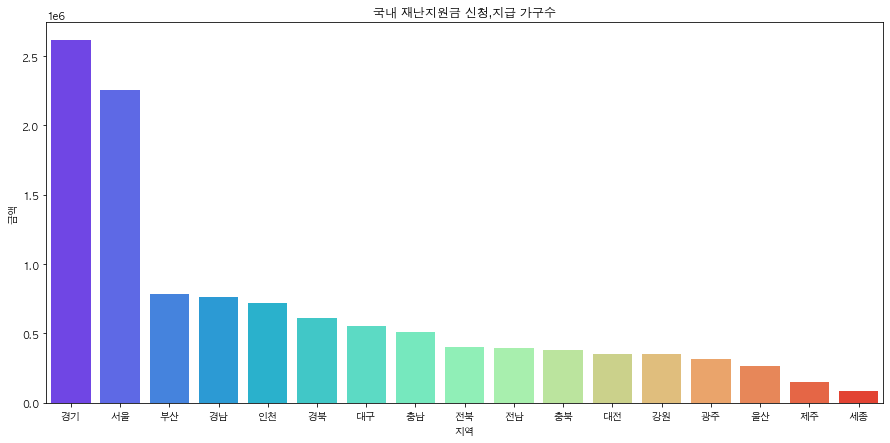

In [279]:
plt.figure(figsize = (15,7))
sns.barplot(data = data, x = "지역", y = '금액', palette = "rainbow", order=data.sort_values('금액', ascending = False).지역).set(title = "국내 재난지원금 신청,지급 가구수")

어떤 방식으로 재난지원금이 사용되었는지? \
제주도는 뭔가 현금이 제일 많이 사용되었을 것 같다. 

### 데이터 정규화

In [284]:
for i ,j in data.iterrows():
    #print(data['현금'][i][j] / j.소계, data['현금'][i])
    #print(data['현금'][i] / data['소계'][i])
    #data["현금"][i] = (j.현금 / j.소계)
#     data["신용체크카드"][i] = data['신용체크카드'][i] / data['소계'][i]
#     data["상품권"][i] = data['상품권'][i] / data['소계'][i]
#     data["선불카드"][i] = data['선불카드'][i] / data['소계'][i]
#     data["금액"][i] = data['금액'][i] / data['소계'][i]
    #print("현금", j.현금 / j.소계)
    print("현금", j.현금 / j.소계)
    #print(data['현금'][j] / data['소계'][j], data["현금"][i])
    #data["소계"] = 1

data

현금 0.1141090148046531
현금 0.19537445797620487
현금 0.17467168463775784
현금 0.13285809198831924
현금 0.15687122578944332
현금 0.13304008160260483
현금 0.10863014463050988
현금 0.07227174376153916
현금 0.1126626771659329
현금 0.2090432791793246
현금 0.18243076151955373
현금 0.18494044975030868
현금 0.255815732013566
현금 0.30188164252318894
현금 0.23814486659152595
현금 0.18848501745003407
현금 0.14160633173319123


,지역,소계,현금,신용체크카드,상품권,선불카드,금액
0,서울,3558746,406085,2846553,18588,287520,2256329
1,부산,1224116,239161,833351,4420,147184,783091
2,대구,846823,147916,587368,42371,69168,555569
3,인천,1085203,144178,760323,180702,0,716754
4,광주,485532,76166,377352,32014,0,318130
5,대전,546061,72648,455273,8097,10043,355192
6,울산,394246,42827,309217,2,42200,268528
7,세종,119701,8651,106011,59,4980,82419
8,경기,4355098,490657,3452541,241637,170263,2612933
9,강원,567825,118700,366557,66616,15952,350289


제두도 
- 현금 사용 비율: %11
- 카드 사용 비율: %77
- 상품권: %2
- 선불카드: %8

In [291]:
for i, j in data.iterrows():
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
